# Forest Cover Type Prediction

<img src="https://live.staticflickr.com/633/31550395483_06cced636f_o.png" width="700" >

**In this project,** the goal is to predict the forest cover type (the predominant kind of tree cover) from strictly cartographic variables. The dataset is from a **Kaggle competition**, and the task is a **multi-class classification problem** where the target variable is 'Cover_Type' (an integer from 1 to 7).

## Features Description

* `Id`: Unique identifier for each observation.
* `Elevation`: Elevation in meters (numeric).
* `Aspect`: Aspect in degrees azimuth (numeric).
* `Slope`: Slope in degrees (numeric).
* `Horizontal_Distance_To_Hydrology`: Horizontal Distance to nearest surface water features (numeric).
* `Vertical_Distance_To_Hydrology`: Vertical Distance to nearest surface water features (numeric).
* `Horizontal_Distance_To_Roadways`: Horizontal Distance to nearest roadway (numeric).
* `Hillshade_9am`: Hillshade index at 9am, summer solstice (numeric; 0 to 255 index).
* `Hillshade_Noon`: Hillshade index at noon, summer solstice (numeric; 0 to 255 index).
* `Hillshade_3pm`: Hillshade index at 3pm, summer solstice (numeric; 0 to 255 index).
* `Horizontal_Distance_To_Fire_Points`: Horizontal Distance to nearest wildfire ignition points (numeric).
* `Wilderness_Area`: Wilderness area designation (categorical; 4 binary columns, 0 = absence or 1 = presence).
* `Soil_Type`: Soil Type designation (categorical; 40 binary columns, 0 = absence or 1 = presence).
* `Cover_Type`: (Target) Forest Cover Type designation (categorical; integers 1 to 7).
    * `1`: Spruce/Fir
    * `2`: Lodgepole Pine
    * `3`: Ponderosa Pine
    * `4`: Cottonwood/Willow
    * `5`: Aspen
    * `6`: Douglas-fir
    * `7`: Krummholz

 ---
The dataset was taken from Kaggle.

[Kaggle | Forest Cover Type Prediction](https://www.kaggle.com/competitions/forest-cover-type-prediction/overview)

## Data Read

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('train.csv')

## EDA - Exploratory Data Analysis

In [3]:
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [4]:
df.tail()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
15115,15116,2607,243,23,258,7,660,170,251,214,1282,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15116,15117,2603,121,19,633,195,618,249,221,91,1325,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15117,15118,2492,134,25,365,117,335,250,220,83,1187,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15118,15119,2487,167,28,218,101,242,229,237,119,932,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15119,15120,2475,197,34,319,78,270,189,244,164,914,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [10]:
df.shape

(15120, 56)

In [5]:
df.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [14]:
df.drop(columns='Id').describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,15120.0,2749.322553,417.678187,1863.0,2376.0,2752.0,3104.00,3849.0
Aspect,15120.0,156.676653,110.085801,0.0,65.0,126.0,261.00,360.0
Slope,15120.0,16.501587,8.453927,0.0,10.0,15.0,22.00,52.0
Horizontal_Distance_To_Hydrology,15120.0,227.195701,210.075296,0.0,67.0,180.0,330.00,1343.0
Vertical_Distance_To_Hydrology,15120.0,51.076521,61.239406,-146.0,5.0,32.0,79.00,554.0
Horizontal_Distance_To_Roadways,15120.0,1714.023214,1325.066358,0.0,764.0,1316.0,2270.00,6890.0
Hillshade_9am,15120.0,212.704299,30.561287,0.0,196.0,220.0,235.00,254.0
Hillshade_Noon,15120.0,218.965608,22.801966,99.0,207.0,223.0,235.00,254.0
Hillshade_3pm,15120.0,135.091997,45.895189,0.0,106.0,138.0,167.00,248.0
Horizontal_Distance_To_Fire_Points,15120.0,1511.147288,1099.936493,0.0,730.0,1256.0,1988.25,6993.0


In [15]:
df["Cover_Type"].unique()

array([5, 2, 1, 7, 3, 6, 4], dtype=int64)

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<Axes: >

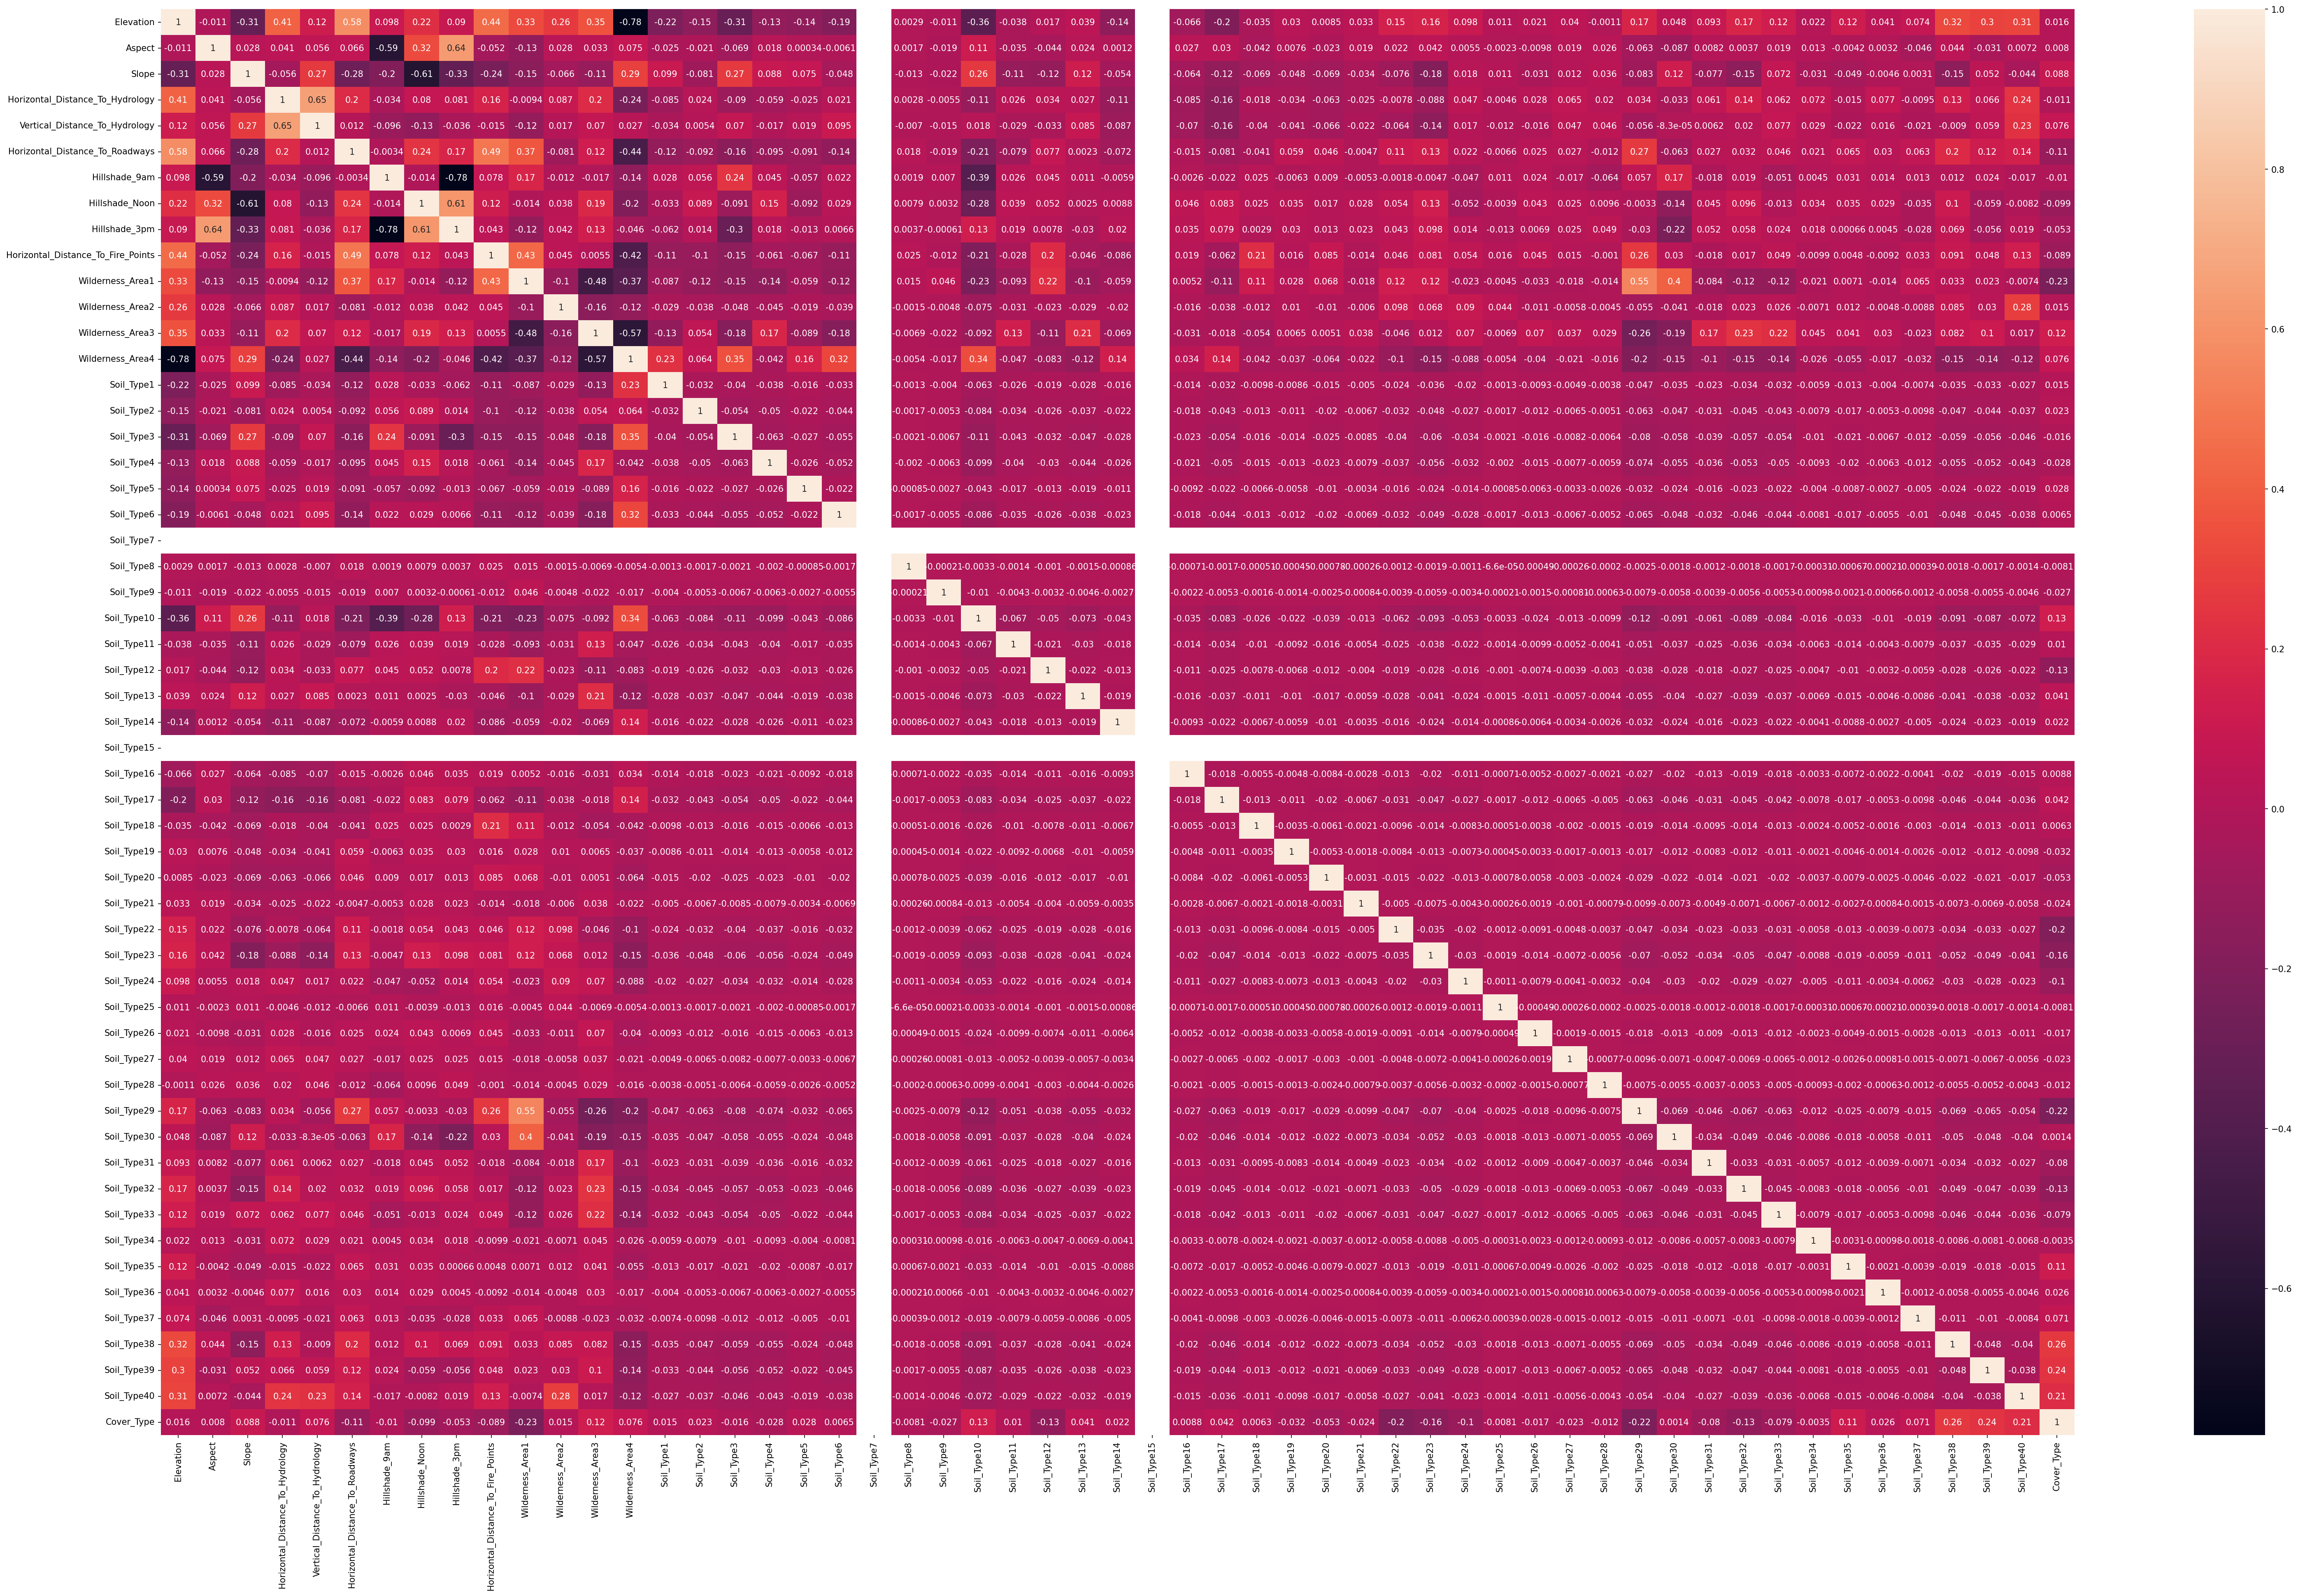

In [21]:
plt.figure(figsize=(50,30), dpi=150)
sns.heatmap(df.drop(columns=['Id']).corr(numeric_only=True), annot=True)

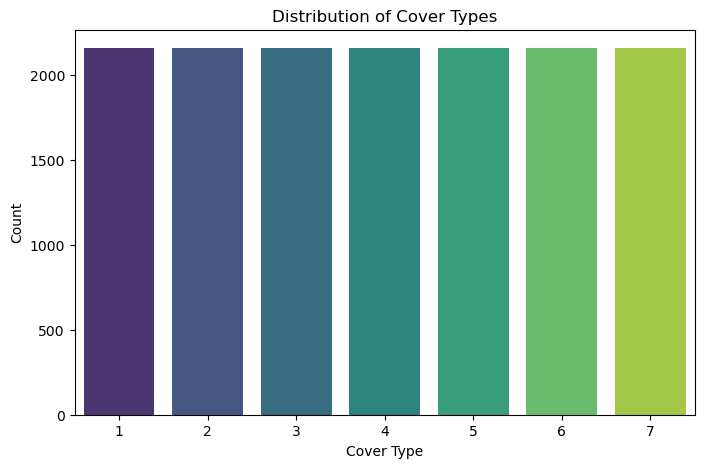

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Cover_Type'], palette='viridis')
plt.xlabel("Cover Type")
plt.ylabel("Count")
plt.title("Distribution of Cover Types")
plt.show()

Text(0.5, 1.0, 'Elevation Distribution Across Cover Types')

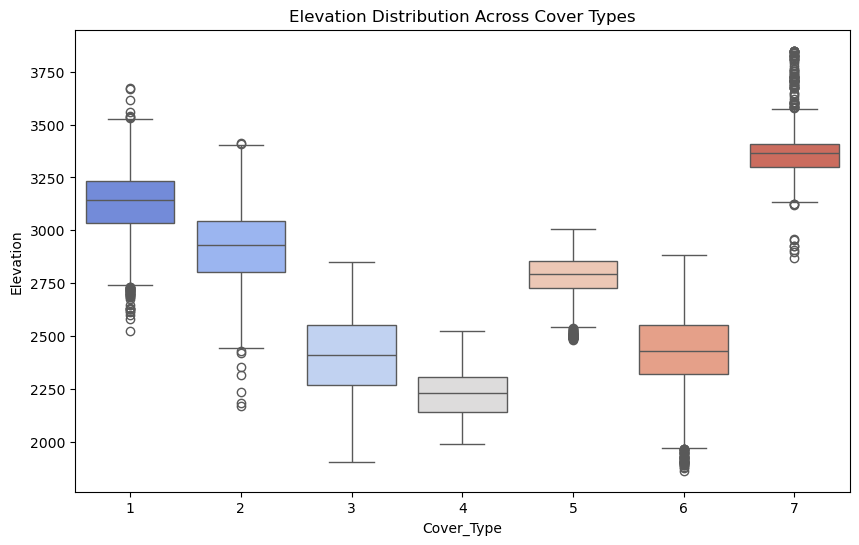

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Cover_Type', y='Elevation', data=df, palette="coolwarm")
plt.title("Elevation Distribution Across Cover Types")

<Axes: xlabel='Cover_Type', ylabel='Slope'>

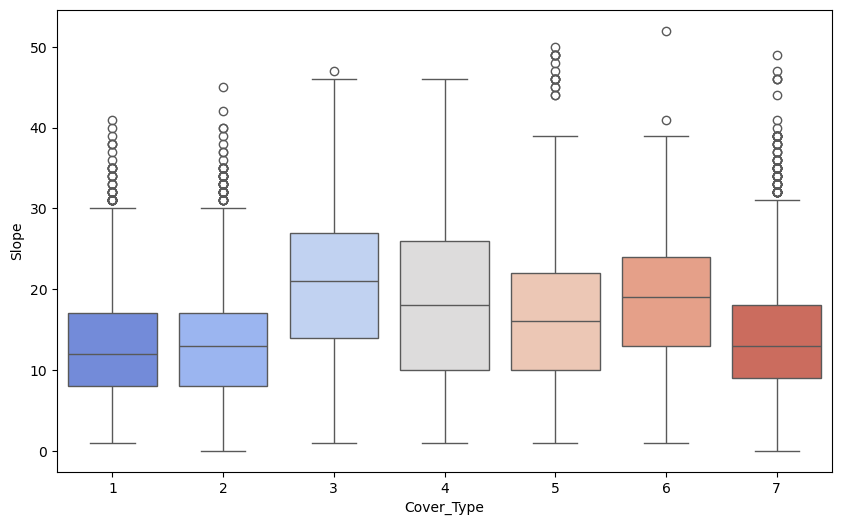

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Cover_Type', y='Slope', data=df, palette="coolwarm")

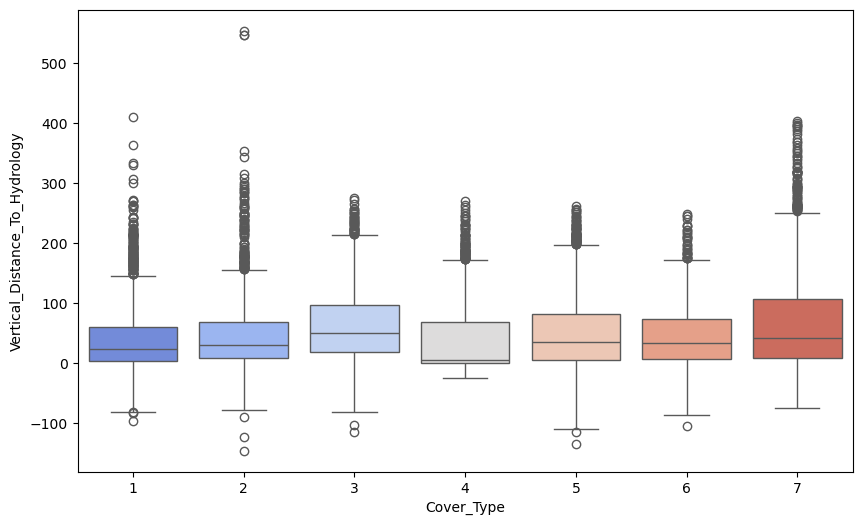

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Cover_Type', y='Vertical_Distance_To_Hydrology', data=df, palette="coolwarm");

In [26]:
abs(df.corr(numeric_only=True)['Cover_Type'].sort_values(ascending=False))

Cover_Type                            1.000000
Soil_Type38                           0.257810
Soil_Type39                           0.240384
Soil_Type40                           0.205851
Soil_Type10                           0.128972
Wilderness_Area3                      0.122146
Soil_Type35                           0.114327
Id                                    0.108363
Slope                                 0.087722
Wilderness_Area4                      0.075774
Vertical_Distance_To_Hydrology        0.075647
Soil_Type37                           0.071210
Soil_Type17                           0.042453
Soil_Type13                           0.040528
Soil_Type5                            0.027692
Soil_Type36                           0.025726
Soil_Type2                            0.022627
Soil_Type14                           0.022019
Elevation                             0.016090
Soil_Type1                            0.015069
Wilderness_Area2                      0.014994
Soil_Type11  

## Modelling

In [27]:
x=df.drop(['Cover_Type','Id'],axis=1)
y=df[['Cover_Type']]

In [31]:


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

b = BernoulliNB()
l = LogisticRegression()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
gb= GradientBoostingClassifier()
kn= KNeighborsClassifier()
ab= AdaBoostClassifier()

def algo_test(x, y):
    modeller=[ b, l, d, r, gb, kn, ab]
    isimler=["BernoulliNB", "LogisticRegression", "DecisionTreeClassifier", 
             "RandomForestClassifier", "GradientBoostingClassifier", "KNeighborsClassifier",
             "AdaBoostClassifier"]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state = 42)
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
    mdl=[]

    print("Veriler hazır modeller deneniyor")
    for model in modeller:
        print(model, " modeli eğitiliyor!..")
        model=model.fit(x_train,y_train)
        tahmin=model.predict(x_test)
        mdl.append(model)
        accuracy.append(accuracy_score(y_test, tahmin))
        precision.append(precision_score(y_test, tahmin, average="micro"))
        recall.append(recall_score(y_test, tahmin, average="micro"))
        f1.append(f1_score(y_test, tahmin, average="micro"))
        print(confusion_matrix(y_test, tahmin))

    print("Eğitim tamamlandı.")
    
    metrics=pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1", "Model"], index=isimler)
    metrics["Accuracy"] = accuracy
    metrics["Precision"] = precision  
    metrics["Recall"] = recall
    metrics["F1"] = f1
    metrics["Model"]=mdl

    metrics.sort_values("F1", ascending=False, inplace=True)

    print("En başarılı model: ", metrics.iloc[0].name)
    model=metrics.iloc[0,-1]
    tahmin=model.predict(np.array(x_test) if model==kn else x_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, tahmin))
    print("classification Report:")
    print(classification_report(y_test, tahmin))
    print("Diğer Modeller:")
    
    return metrics.drop("Model", axis=1)



In [32]:
algo_test(x,y)

Veriler hazır modeller deneniyor
BernoulliNB()  modeli eğitiliyor!..
[[184 126   2   0  74   0  35]
 [ 85 208  10   0 116  13   6]
 [  2   1 201  54  22 148   0]
 [  0   0  58 378   0  13   0]
 [ 31  56  33   0 278  18   0]
 [  5   9  90  42  59 227   0]
 [ 27  23   2   0  17   0 371]]
LogisticRegression()  modeli eğitiliyor!..
[[176  67   0   0  52  15 111]
 [ 81 181  12   3  72  50  39]
 [  4  27 153 111  53  78   2]
 [  0   6  59 359   9  15   1]
 [ 21  84  27   1 191  74  18]
 [  6  54 136  70  74  84   8]
 [121  18   2   0   8   0 291]]
DecisionTreeClassifier()  modeli eğitiliyor!..
[[291  90   0   0   9   0  31]
 [106 262   9   0  45  11   5]
 [  1   8 323  17   6  73   0]
 [  0   0  17 426   0   6   0]
 [  3  18   9   0 379   6   1]
 [  3  16  60  23   5 325   0]
 [ 35   4   1   0   0   0 400]]
RandomForestClassifier()  modeli eğitiliyor!..
[[329  55   0   0  15   0  22]
 [ 82 301  17   0  30   7   1]
 [  0   1 357  21   3  46   0]
 [  0   0   3 442   0   4   0]
 [  0   8   9   

,Accuracy,Precision,Recall,F1
RandomForestClassifier,0.867725,0.867725,0.867725,0.867725
KNeighborsClassifier,0.804894,0.804894,0.804894,0.804894
GradientBoostingClassifier,0.802249,0.802249,0.802249,0.802249
DecisionTreeClassifier,0.795635,0.795635,0.795635,0.795635
BernoulliNB,0.610780,0.610780,0.610780,0.610780
LogisticRegression,0.474537,0.474537,0.474537,0.474537
AdaBoostClassifier,0.397156,0.397156,0.397156,0.397156


##  Conclusion

In this project, seven different machine learning algorithms were trained and evaluated to predict forest cover types. The models tested included RandomForest, KNeighbors, GradientBoosting, DecisionTree, BernoulliNB, LogisticRegression, and AdaBoost.

Based on the accuracy scores, the **RandomForestClassifier** emerged as the most successful model, achieving an overall accuracy of approximately **86.77%**. This model significantly outperformed all other algorithms, with the next best models, KNeighborsClassifier and GradientBoostingClassifier, scoring around 80%.